In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
## input
df = pd.read_csv("data/train.csv")

## mapping strings to numbers
df["Sex"] = df["Sex"].replace({"male":0, "female":1})
df["Embarked"] = df["Embarked"].replace({'C':0, 'S':1, 'Q':2})

## handling names
title_dict = {"Mr.":0, "Mrs.":1, "Mme.":1, "Miss.":2, "Mlle.":2, "Master.":3, "Dr.":4, "Rev.": 5}
for i_row, row in df.iterrows():
    name_str = row["Name"]
    if not isinstance(name_str, str):
        break # break the loop if the names have already been replaced by ints
    df.loc[i_row,"Name"] = 6 # assign the default value at the begining
    for word in name_str.split():
        if word in title_dict.keys():
            df.loc[i_row,"Name"] = title_dict[word]
            break # break the loop if the key value has been found
        
## handling nans
df = df.drop(columns=["Cabin"])
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode().iloc[0])

## get dummies
features = ["Pclass", "Name"]
for f in features:
    df = pd.concat([df.drop(columns=f), pd.get_dummies(df[f], prefix=f)], axis=1)

## creating input and output dataframes
yf = df["Survived"]
Xf = df.drop(columns=["PassengerId", "Survived", "Ticket"])

## normalizing
features = ["Age", "Fare"]
Xf[features] = (Xf[features] - Xf[features].mean()) / Xf[features].std()
print(Xf.head())

   Sex       Age  SibSp  Parch      Fare  Embarked  Pclass_1  Pclass_2  \
0    0 -0.565419      1      0 -0.502163       1.0         0         0   
1    1  0.663488      1      0  0.786404       0.0         1         0   
2    1 -0.258192      0      0 -0.488580       1.0         0         0   
3    1  0.433068      1      0  0.420494       1.0         1         0   
4    0  0.433068      0      0 -0.486064       1.0         0         0   

   Pclass_3  Name_0  Name_1  Name_2  Name_3  Name_4  Name_5  Name_6  
0         1       1       0       0       0       0       0       0  
1         0       0       1       0       0       0       0       0  
2         1       0       0       1       0       0       0       0  
3         0       0       1       0       0       0       0       0  
4         1       1       0       0       0       0       0       0  


In [6]:
## Logistic regression calculation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

frac_train = 0.75
m, n = Xf.shape
frac_tot_arr = np.linspace(0.05, 1, 401)
score_train_arr, score_test_arr = [], []
for frac_tot in frac_tot_arr:
    print("#"*int(100*frac_tot), "{0:.0f}%".format(100*frac_tot), end='\r')
    # randomly choosing samples and splitting into train and test
    Xnp_train, Xnp_test, ynp_train, ynp_test = \
        train_test_split(Xf, yf, test_size=frac_tot*(1-frac_train), train_size=frac_tot*frac_train)
    # training
    clf = LogisticRegression(solver='newton-cg', multi_class='multinomial')
    clf.fit(Xnp_train, ynp_train)
    # evaluating
    score_train_arr.append(accuracy_score(clf.predict(Xnp_train), ynp_train))
    score_test_arr.append(accuracy_score(clf.predict(Xnp_test), ynp_test))

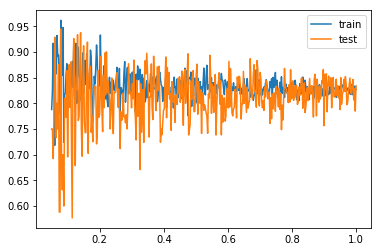

Final accuracy for logistic regression 0.8340807174887892


In [7]:
## Logistic regression plotting
fig, fax = plt.subplots()
fax.plot(frac_tot_arr, score_train_arr, label="train")
fax.plot(frac_tot_arr, score_test_arr, label="test")
plt.legend()
plt.show()
print("Final accuracy for logistic regression", accuracy_score(clf.predict(Xnp_test), ynp_test))